In [41]:
from pathlib import Path
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

In [42]:
path= "Clean_CSV.csv"
social_data= pd.read_csv(path)
social_data.head()

,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
0,1,25,Female,Instagram,120.0,3.0,45.0,10.0,12.0,Happiness
1,2,30,Male,Twitter,90.0,5.0,20.0,25.0,30.0,Anger
2,3,22,Non-binary,Facebook,60.0,2.0,15.0,5.0,20.0,Neutral
3,4,28,Female,Instagram,200.0,8.0,100.0,30.0,50.0,Anxiety
4,5,33,Male,LinkedIn,45.0,1.0,5.0,2.0,10.0,Boredom


### Question 1
* Analysis for Gender vs Emotional Well bing

In [43]:
# 1 Gender vs Emotional Well being

ques_1 = social_data[["Gender", "Dominant_Emotion"]]
ques_1

,Gender,Dominant_Emotion
0,Female,Happiness
1,Male,Anger
2,Non-binary,Neutral
3,Female,Anxiety
4,Male,Boredom
...,...,...
919,Non-binary,Boredom
920,Female,Neutral
921,Male,Happiness
922,Non-binary,Anger


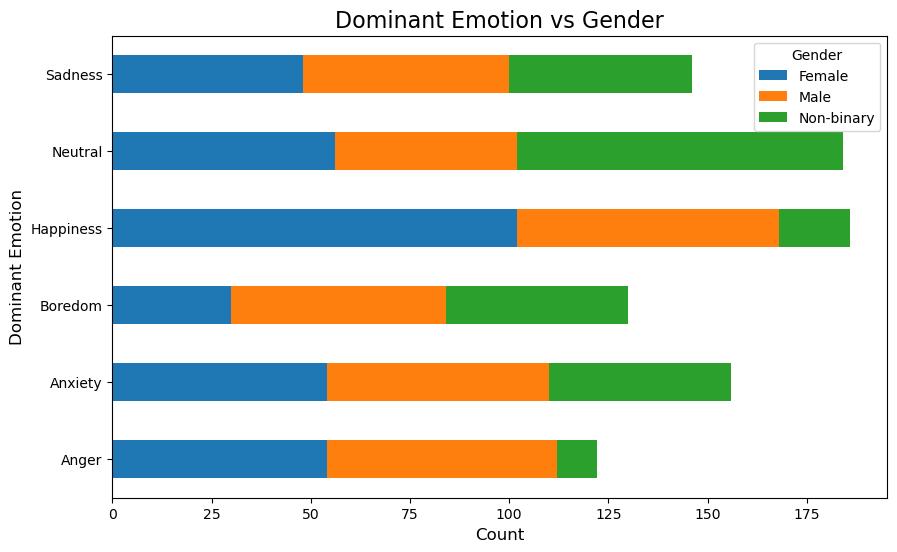

In [44]:
# Create a contingency table for Gender and Dominant Emotion
contingency_table = pd.crosstab(social_data['Dominant_Emotion'], social_data['Gender'])

# Plot the data as a horizontal bar plot
contingency_table.plot(kind='barh', stacked=True, figsize=(10,6))

# Set plot title and labels
plt.title('Dominant Emotion vs Gender', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Dominant Emotion', fontsize=12)

# Display the plot
plt.show()

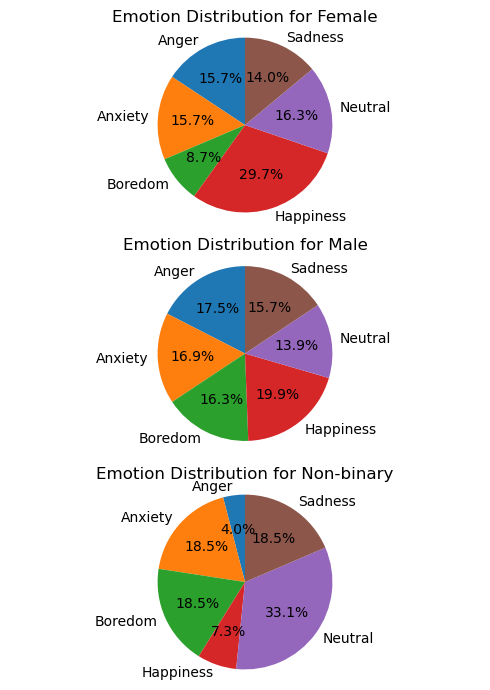

In [45]:
# Create a contingency table for Gender and Dominant Emotion
contingency_table = pd.crosstab(social_data['Dominant_Emotion'], social_data['Gender'])

# Plot a pie chart for the distribution of emotions for each gender
plt.figure(figsize=(5, 7))  # Adjusting the figure size for vertical layout

# Plotting the pie chart for each gender's emotion distribution
for idx, gender in enumerate(contingency_table.columns):
    plt.subplot(len(contingency_table.columns), 1, idx + 1)  # Adjusting subplot for vertical layout
    plt.pie(contingency_table[gender], labels=contingency_table.index, autopct='%1.1f%%', startangle=90)
    plt.title(f'Emotion Distribution for {gender}')
    plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.

plt.tight_layout()
plt.show()

### Question 8
* Analysis for Age vs Minutes Spent vs Well being

In [46]:
# 8 Age vs Minutes Spent vs Well being
ques_8 = social_data[["Age","Daily_Usage_Time (minutes)","Dominant_Emotion"]]
ques_8 

,Age,Daily_Usage_Time (minutes),Dominant_Emotion
0,25,120.0,Happiness
1,30,90.0,Anger
2,22,60.0,Neutral
3,28,200.0,Anxiety
4,33,45.0,Boredom
...,...,...,...
919,33,85.0,Boredom
920,22,70.0,Neutral
921,35,110.0,Happiness
922,28,60.0,Anger


In [47]:
age_max= social_data["Age"].max()
print(age_max)
age_min= social_data["Age"].min()
print(age_min)
age_average = social_data["Age"].mean()
print(age_average)
age_count= social_data["Age"].value_counts()
print(age_count)


35
21
27.5
Age
28    92
27    92
29    90
22    74
26    66
25    64
24    64
31    62
33    56
21    56
30    48
23    48
35    38
32    38
34    36
Name: count, dtype: int64


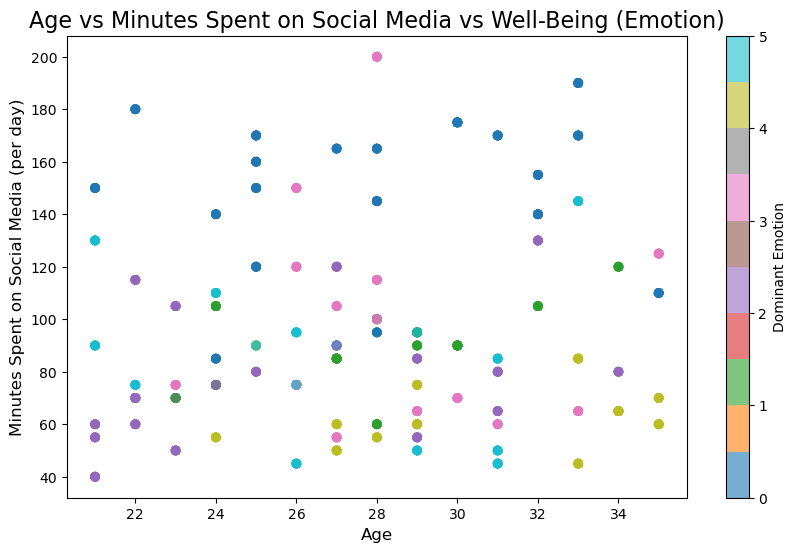

In [48]:
# Mapping emotions to numeric values for color
emotion_mapping = {emotion: idx for idx, emotion in enumerate(social_data['Dominant_Emotion'].unique())}
social_data['Emotion_Num'] = social_data['Dominant_Emotion'].map(emotion_mapping)

# Create the scatter plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(social_data['Age'], social_data['Daily_Usage_Time (minutes)'], 
                      c=social_data['Emotion_Num'], cmap='tab10', alpha=0.6)

# Add a color bar to represent emotions
plt.colorbar(scatter, label='Dominant Emotion')

# Set plot title and labels
plt.title('Age vs Minutes Spent on Social Media vs Well-Being (Emotion)', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Minutes Spent on Social Media (per day)', fontsize=12)

# Show the plot
plt.show()

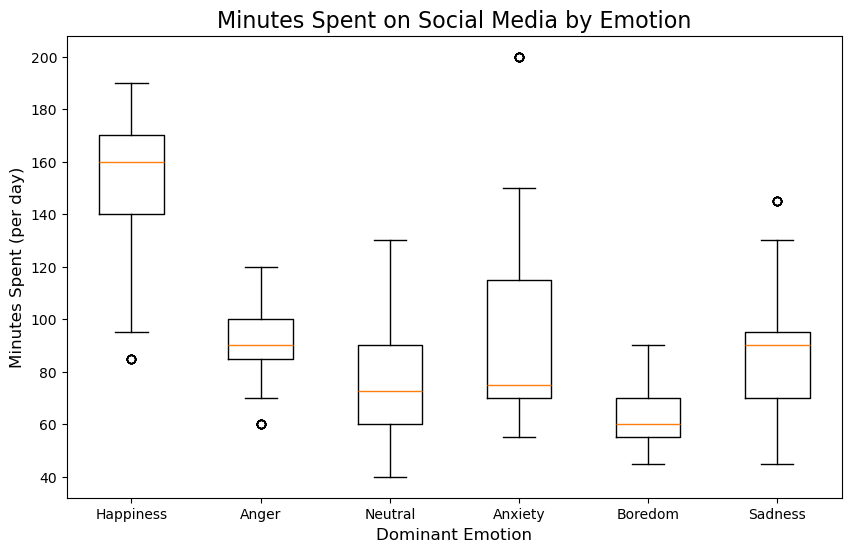

In [49]:
# Create a box plot for age and minutes spent by dominant emotion
plt.figure(figsize=(10, 6))

# Create the box plot
plt.boxplot([social_data[social_data['Dominant_Emotion'] == emotion]['Daily_Usage_Time (minutes)'] for emotion in social_data['Dominant_Emotion'].unique()],
            labels=social_data['Dominant_Emotion'].unique())

# Set plot title and labels
plt.title('Minutes Spent on Social Media by Emotion', fontsize=16)
plt.xlabel('Dominant Emotion', fontsize=12)
plt.ylabel('Minutes Spent (per day)', fontsize=12)

# Show the plot
plt.show()

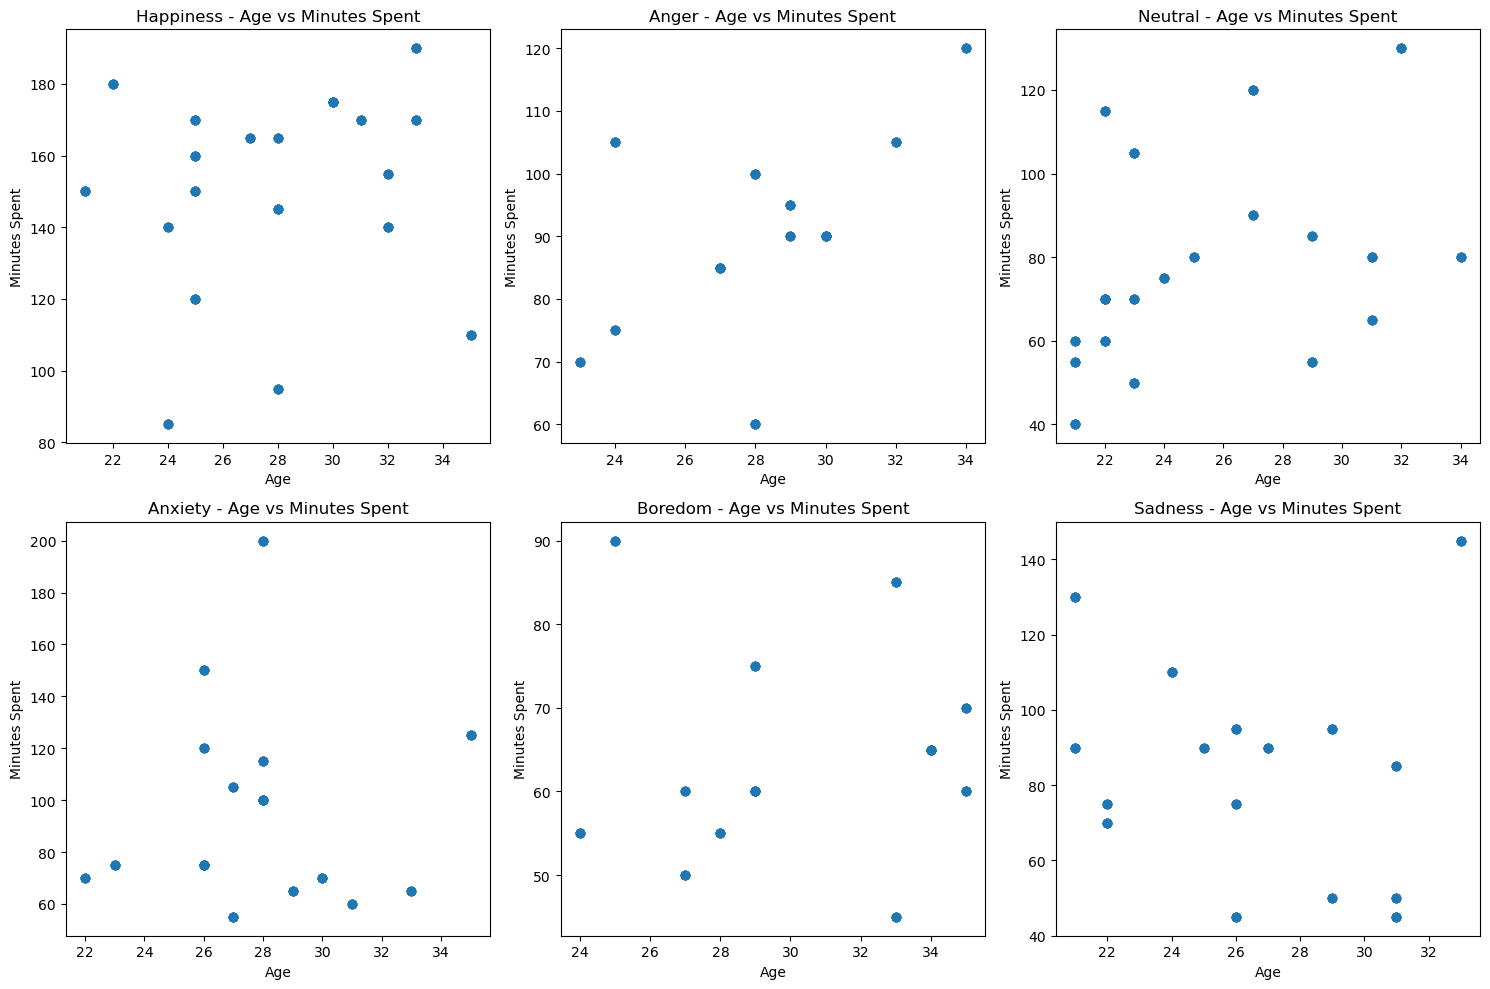

In [50]:
# Set up the figure for subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))  # Adjust grid size based on emotions
axes = axes.flatten()  # Flatten axes for easier iteration

# Plot data for each emotion
for idx, emotion in enumerate(social_data['Dominant_Emotion'].unique()):
    ax = axes[idx]
    
    # Filter data for the specific emotion
    emotion_data = social_data[social_data['Dominant_Emotion'] == emotion]
    
    # Plot for Age vs Minutes Spent
    ax.scatter(emotion_data['Age'], emotion_data['Daily_Usage_Time (minutes)'], alpha=0.6)
    
    # Set titles and labels
    ax.set_title(f'{emotion} - Age vs Minutes Spent', fontsize=12)
    ax.set_xlabel('Age')
    ax.set_ylabel('Minutes Spent')
    
plt.tight_layout()
plt.show()

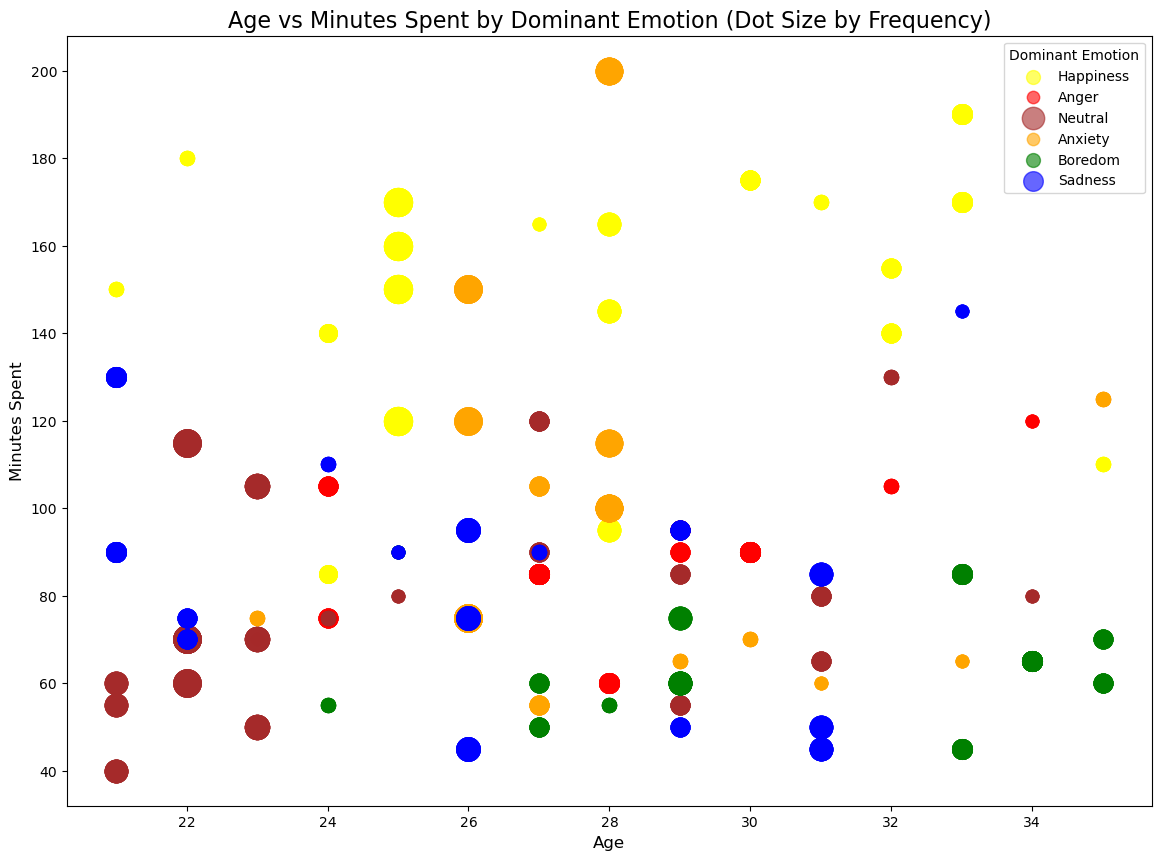

In [60]:

# Define colors for each emotion
emotion_colors = {
    'Anger': 'red',
    'Happiness': 'yellow',
    'Neutral': 'brown',
    'Anxiety': 'orange',
    'Boredom': 'green',
    'Sadness': 'blue'
}

# Set up the figure for the plot
plt.figure(figsize=(14, 10))

# Group data by Age and Dominant Emotion to count occurrences
emotion_counts = social_data.groupby(['Age', 'Dominant_Emotion']).size().reset_index(name='count')

# Plot data for each emotion with specified colors and dot size based on the count of each emotion in each age group
for emotion in social_data['Dominant_Emotion'].unique():
    # Filter data for the specific emotion and create a copy of the DataFrame to avoid the SettingWithCopyWarning
    emotion_data = emotion_counts[emotion_counts['Dominant_Emotion'] == emotion].copy()
    
    # Adjust the dot size based on the count of each emotion within each age group
    size_factor = 10  # Adjust this factor to make the sizes more readable
    emotion_data['dot_size'] = emotion_data['count'] * size_factor  # Safely assign dot_size
    
    # Plot for Age vs Minutes Spent with color mapped to emotion and size based on count
    for idx, row in emotion_data.iterrows():
        # Filter the original social_data for the age group and emotion combination
        age_data = social_data[(social_data['Age'] == row['Age']) & (social_data['Dominant_Emotion'] == emotion)]
        
        # Plot each group with the correct color and size
        plt.scatter(age_data['Age'], age_data['Daily_Usage_Time (minutes)'],
                    color=emotion_colors.get(emotion, 'grey'),  # Default to grey if emotion is not in the dictionary
                    s=row['dot_size'],  # Set the size of each dot based on the count
                    label=emotion if idx == emotion_data.index[0] else "", alpha=0.6)

# Set titles and labels
plt.title('Age vs Minutes Spent by Dominant Emotion (Dot Size by Frequency)', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Minutes Spent', fontsize=12)

# Add a legend to differentiate the emotions
plt.legend(title="Dominant Emotion", loc='upper right')

# Show the plot
plt.show()


### Question 11
* Analysis for Platform vs emotional well being

In [6]:
# 11 Platform vs emotional well being
ques_11 = social_data[["Platform", "Dominant_Emotion"]]
ques_11

,Platform,Dominant_Emotion
0,Instagram,Happiness
1,Twitter,Anger
2,Facebook,Neutral
3,Instagram,Anxiety
4,LinkedIn,Boredom
...,...,...
919,Twitter,Boredom
920,Facebook,Neutral
921,Whatsapp,Happiness
922,Telegram,Anger
